In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target

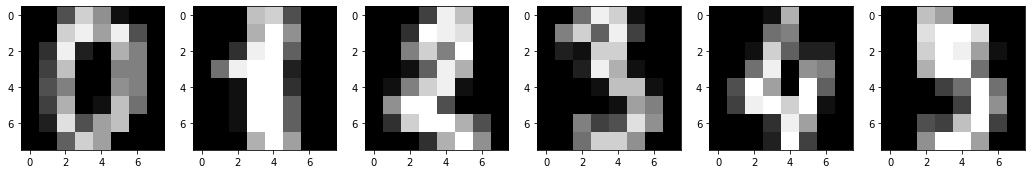

In [3]:
N = 6

plt.figure(figsize=(18,3));
plt_params = dict(cmap=plt.cm.gray, interpolation='nearest', clim=(0, 16))
for k in range(N):
    plt.subplot(1, N, k+1);
    plt.imshow(mnist.data[k].reshape(8,8), **plt_params);

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

In [4]:
SVM_model = SVC()
SVM_model.fit(X, y)

SVC()

In [5]:
cv = KFold(n_splits=5, shuffle=True)

cv_score_ls = []
for i in range(5):
    scores = cross_val_score(SVM_model, X, y, cv=cv)
    print(f"{i}: accuracy mean: {np.mean(scores):.5f};    std: {np.std(scores):.5f}")
    cv_score_ls.append(np.mean(scores))
print("------")
print(f"CV accuracy mean: {np.mean(cv_score_ls):.5f};    std: {np.std(cv_score_ls):.5f}")

0: accuracy mean: 0.98776;    std: 0.00797
1: accuracy mean: 0.98720;    std: 0.00377
2: accuracy mean: 0.98665;    std: 0.00753
3: accuracy mean: 0.98887;    std: 0.00727
4: accuracy mean: 0.98887;    std: 0.00556
------
CV accuracy mean: 0.98787;    std: 0.00089


In [13]:
gs_values = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2,3,4],
    "gamma": ['scale', 'auto'],
    'C': [1, 1.5, 0.5, 2, 3]
}

cv = KFold(n_splits=5, shuffle=True)

gs_acc = GridSearchCV(SVM_model, param_grid=gs_values, cv=cv, scoring='accuracy')
gs_acc.fit(X, y)

print(f"best_params: {gs_acc.best_params_}")
print(f"best_accuracy_score: {gs_acc.best_score_:.5f}")

best_params: {'C': 3, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best_accuracy_score: 0.98887


In [ ]:
best_params: {'C': 1.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best_accuracy_score: 0.98999

In [ ]:
best_params: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
best_accuracy_score: 0.98776

In [14]:
SVM_model = SVC(C= 1.5, degree= 1, gamma= 'scale', kernel= 'rbf')
SVM_model.fit(X, y)

cv = KFold(n_splits=5, shuffle=True)

cv_score_ls = []
for i in range(5):
    scores = cross_val_score(SVM_model, X, y, cv=cv)
    print(f"{i}: accuracy mean: {np.mean(scores):.5f};    std: {np.std(scores):.5f}")
    cv_score_ls.append(np.mean(scores))
print("------")
print(f"CV accuracy mean: {np.mean(cv_score_ls):.5f};    std: {np.std(cv_score_ls):.5f}")

0: accuracy mean: 0.98999;    std: 0.00573
1: accuracy mean: 0.98999;    std: 0.00648
2: accuracy mean: 0.98887;    std: 0.00826
3: accuracy mean: 0.98832;    std: 0.00444
4: accuracy mean: 0.98998;    std: 0.00284
------
CV accuracy mean: 0.98943;    std: 0.00070


In [16]:
SVM_model = SVC(C= 1.5, degree= 1, gamma= 'scale', kernel= 'rbf')
SVM_model.fit(X_train, y_train)

SVC(C=1.5, degree=1)

In [18]:
y_pred = SVM_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       163
           1       0.90      0.96      0.93       164
           2       0.99      0.99      0.99       163
           3       1.00      0.93      0.96       169
           4       0.99      0.96      0.97       165
           5       0.96      0.96      0.96       167
           6       0.99      0.99      0.99       158
           7       0.93      0.99      0.96       154
           8       0.95      0.94      0.94       154
           9       0.90      0.89      0.90       161

    accuracy                           0.96      1618
   macro avg       0.96      0.96      0.96      1618
weighted avg       0.96      0.96      0.96      1618



In [20]:
accuracy_score(y_test, y_pred)

0.9610630407911002

In [21]:
confusion_matrix(y_test, y_pred)

array([[162,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 157,   1,   0,   0,   1,   1,   0,   4,   0],
       [  0,   0, 162,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 157,   0,   1,   0,   2,   4,   5],
       [  0,   0,   0,   0, 158,   0,   0,   3,   0,   4],
       [  0,   0,   0,   0,   0, 161,   0,   0,   0,   6],
       [  0,   1,   0,   0,   0,   1, 156,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 153,   0,   1],
       [  0,   4,   0,   0,   1,   3,   0,   1, 145,   0],
       [  0,  13,   0,   0,   0,   0,   0,   4,   0, 144]], dtype=int64)

## Breast Cancer

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder

In [3]:
breast_cancer = load_breast_cancer()

In [4]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, binary_encoded_y, random_state=1)

In [5]:
SVM_model = SVC()
SVM_model.fit(X, y)

cv = KFold(n_splits=5, shuffle=True)

cv_score_ls = []
for i in range(5):
    scores = cross_val_score(SVM_model, X, y, cv=cv)
    print(f"{i}: accuracy mean: {np.mean(scores):.5f};    std: {np.std(scores):.5f}")
    cv_score_ls.append(np.mean(scores))
print("------")
print(f"CV accuracy mean: {np.mean(cv_score_ls):.5f};    std: {np.std(cv_score_ls):.5f}")

0: accuracy mean: 0.91744;    std: 0.01171
1: accuracy mean: 0.91220;    std: 0.03835
2: accuracy mean: 0.91391;    std: 0.03002
3: accuracy mean: 0.91037;    std: 0.02740
4: accuracy mean: 0.91911;    std: 0.03315
------
CV accuracy mean: 0.91461;    std: 0.00324


In [7]:
gs_values = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2,3,4],
    'C': [1, 1.5, 0.5, 2, 3]
}

cv = KFold(n_splits=5, shuffle=True)

gs_acc = GridSearchCV(SVM_model, param_grid=gs_values, cv=cv, scoring='accuracy')
gs_acc.fit(X, y)

print(f"best_params: {gs_acc.best_params_}")
print(f"best_accuracy_score: {gs_acc.best_score_:.5f}")

best_params: {'C': 1.5, 'degree': 1, 'kernel': 'linear'}
best_accuracy_score: 0.96133


In [8]:
SVM_model = SVC(C= 1.5, degree= 1, kernel= 'linear')
SVM_model.fit(X, y)

cv = KFold(n_splits=5, shuffle=True)

cv_score_ls = []
for i in range(5):
    scores = cross_val_score(SVM_model, X, y, cv=cv)
    print(f"{i}: accuracy mean: {np.mean(scores):.5f};    std: {np.std(scores):.5f}")
    cv_score_ls.append(np.mean(scores))
print("------")
print(f"CV accuracy mean: {np.mean(cv_score_ls):.5f};    std: {np.std(cv_score_ls):.5f}")

0: accuracy mean: 0.96136;    std: 0.02516
1: accuracy mean: 0.95609;    std: 0.01234
2: accuracy mean: 0.95782;    std: 0.01165
3: accuracy mean: 0.95602;    std: 0.01939
4: accuracy mean: 0.96126;    std: 0.02540
------
CV accuracy mean: 0.95851;    std: 0.00238


In [6]:
%%time
SVM_model = SVC(C= 1.5, degree= 1, kernel= 'linear')
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

Wall time: 1.43 s


In [10]:
y_pred = SVM_model.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.93      0.91      0.92        55

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [8]:
accuracy_score(y_test, y_pred)

0.9370629370629371

In [9]:
confusion_matrix(y_test, y_pred)

array([[84,  4],
       [ 5, 50]], dtype=int64)